### In this file, we have decided to some exploration of out selected features ('mfe', 'efe', 'dG', 'triplets0', 'mfei4', 'dP', 'bp_number') input into our model. To this point we have trained our model from onply one species, and then used the validation data on that specific species. Now we want to see if the class created is universal (the postive hits have similar data for each species) or if they are different. If different, in future studies we will consider a different model such as DBScan, but if the same, we will proceed to training our model by concatenating all the speices data, and then running the 60-20-20 split of training, validation, and testing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### load data

In [2]:
ath_data = pd.read_csv("raw_data/ath.csv")
cel_data = pd.read_csv("raw_data/cel.csv")
dme_data = pd.read_csv("raw_data/dme.csv")

/var/folders/cs/48rd607d56dgkby39r27lkdr0000gn/T/ipykernel_14529/2318744749.py:3: DtypeWarning: Columns (22,75) have mixed types. Specify dtype option on import or set low_memory=False.
  dme_data = pd.read_csv("raw_data/dme.csv")


In [3]:
cel_data = cel_data.dropna()
ath_data = ath_data.dropna()
dme_data = dme_data.dropna()


In [4]:
dme_data.columns = dme_data.columns.str.strip()  # Remove leading/trailing spaces


In [5]:
dme_data.columns
print(cel_data.columns)

Index(['sequence_names', 'nt_proportion0', 'nt_proportion1', 'nt_proportion2',
       'nt_proportion3', 'dinucleotide_proportion0',
       'dinucleotide_proportion1', 'dinucleotide_proportion2',
       'dinucleotide_proportion3', 'dinucleotide_proportion4',
       'dinucleotide_proportion5', 'dinucleotide_proportion6',
       'dinucleotide_proportion7', 'dinucleotide_proportion8',
       'dinucleotide_proportion9', 'dinucleotide_proportion10',
       'dinucleotide_proportion11', 'dinucleotide_proportion12',
       'dinucleotide_proportion13', 'dinucleotide_proportion14',
       'dinucleotide_proportion15', 'gc_content', 'gc_ratio',
       'sequence_length', 'stem_number', 'avg_bp_stem', 'longest_stem_length',
       'terminal_loop_length', 'bp_number', 'dP', 'bp_proportion0',
       'bp_proportion1', 'bp_proportion2', 'bp_proportion_stem0',
       'bp_proportion_stem1', 'bp_proportion_stem2', 'triplets0', 'triplets1',
       'triplets2', 'triplets3', 'triplets4', 'triplets5', 'triplets

In [6]:
dme_positive = dme_data[dme_data['CLASS'] == 1]
dme_negative = dme_data[dme_data['CLASS'] == 0]

cel_positive = cel_data[cel_data['CLASS'] == 1]
cel_negative = cel_data[cel_data['CLASS'] == 0]

ath_positive = ath_data[ath_data['CLASS'] == 1]
ath_negative = ath_data[ath_data['CLASS'] == 0]


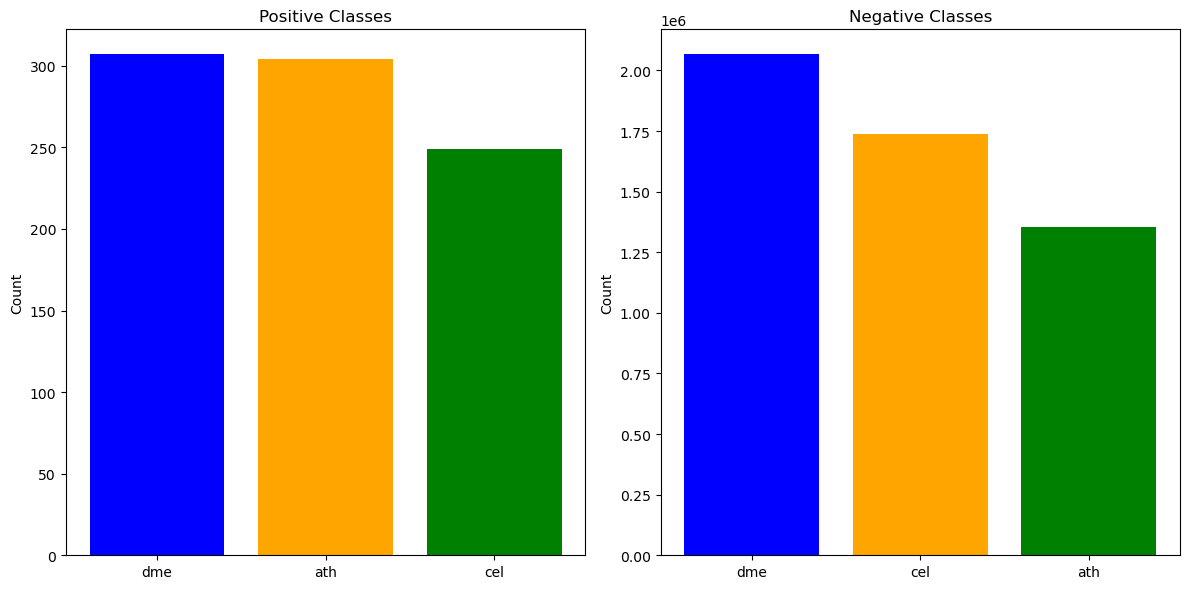

In [7]:
dme_data['Dataset'] = 'dme'
cel_data['Dataset'] = 'cel'
ath_data['Dataset'] = 'ath'

# Concatenate the datasets vertically
combined_data = pd.concat([dme_data, cel_data, ath_data])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive classes
pos_data = combined_data[combined_data['CLASS'] == 1]
pos_counts = pos_data['Dataset'].value_counts()
axes[0].bar(pos_counts.index, pos_counts.values, color=['blue', 'orange', 'green'])
axes[0].set_title('Positive Classes')
axes[0].set_ylabel('Count')

# Plot for negative classes
neg_data = combined_data[combined_data['CLASS'] == 0]
neg_counts = neg_data['Dataset'].value_counts()
axes[1].bar(neg_counts.index, neg_counts.values, color=['blue', 'orange', 'green'])
axes[1].set_title('Negative Classes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [9]:
dme_data.columns = dme_data.columns.str.strip()  # Remove leading/trailing spaces
extracted_features = ['mfe', 'efe', 'dG', 'triplets0', 'mfei4', 'dP', 'bp_number']

dme_x_positive = dme_positive[extracted_features]
dme_x_negative = dme_negative[extracted_features]

cel_x_positive = cel_positive[extracted_features]
cel_x_negative = cel_negative[extracted_features]

ath_x_positive = ath_positive[extracted_features]
ath_x_negative = ath_negative[extracted_features]


304

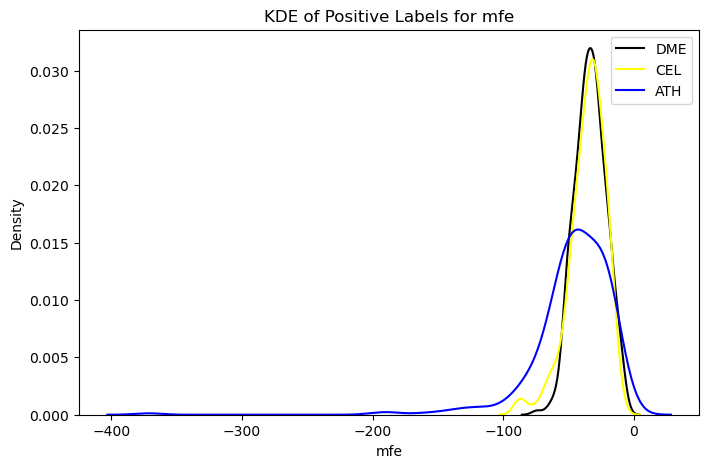

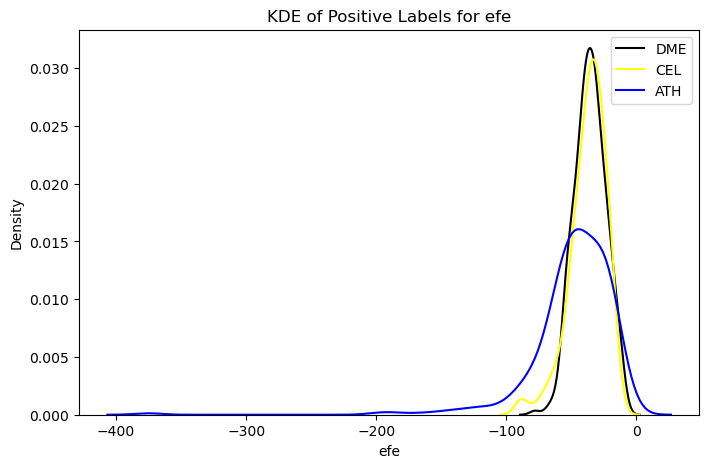

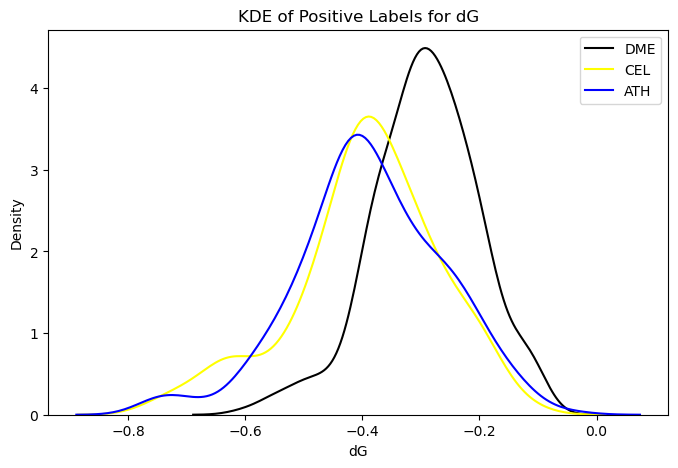

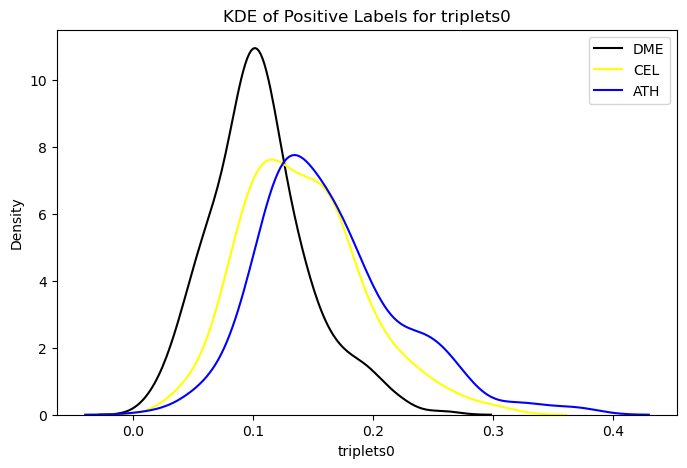

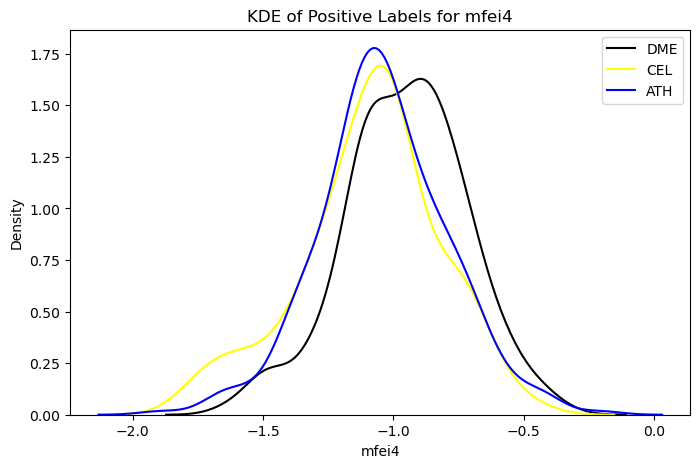

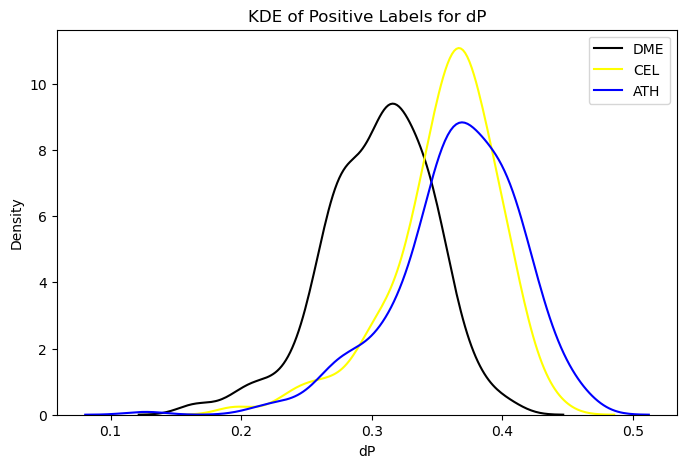

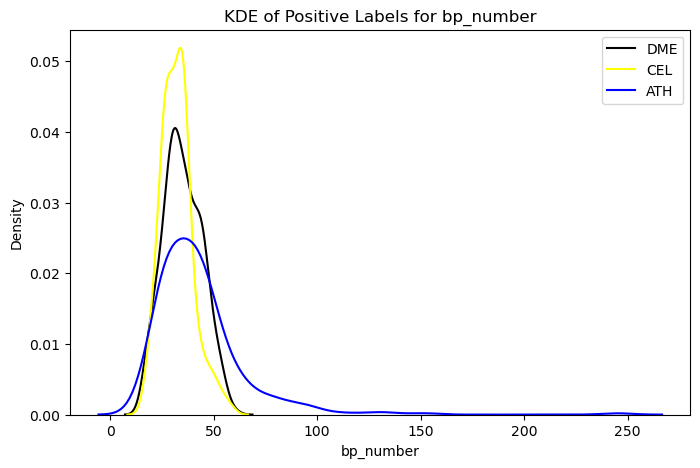

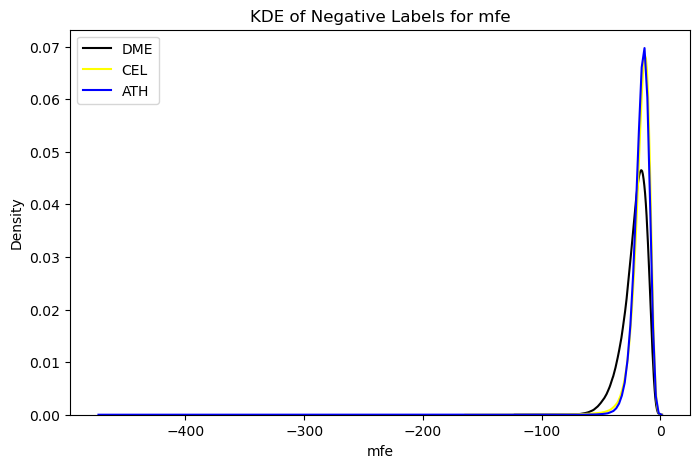

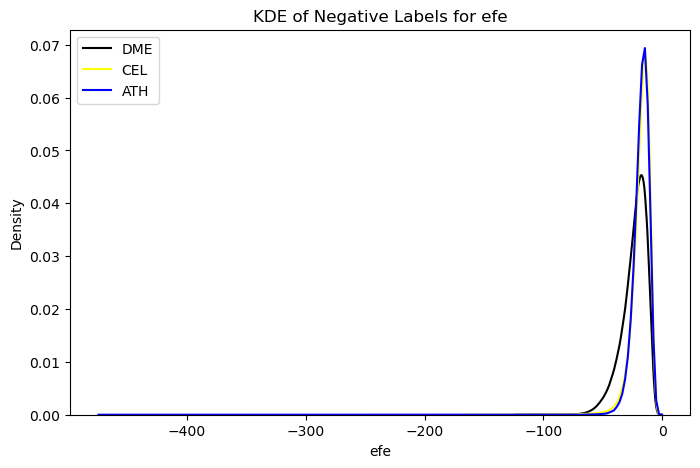

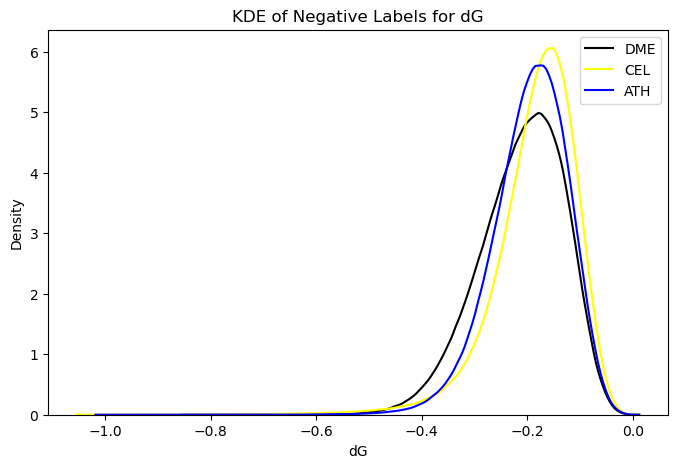

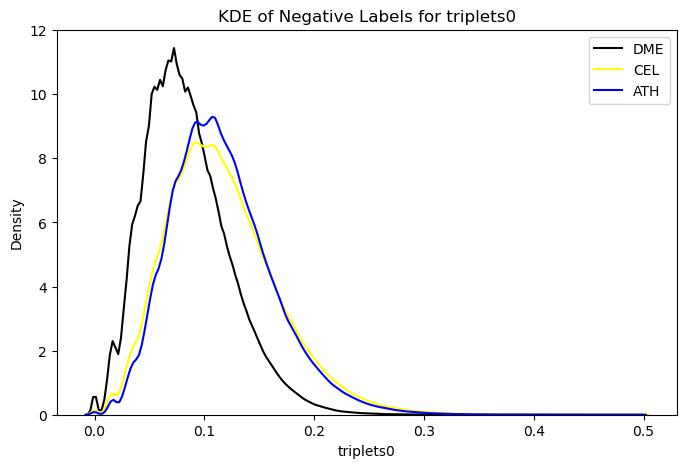

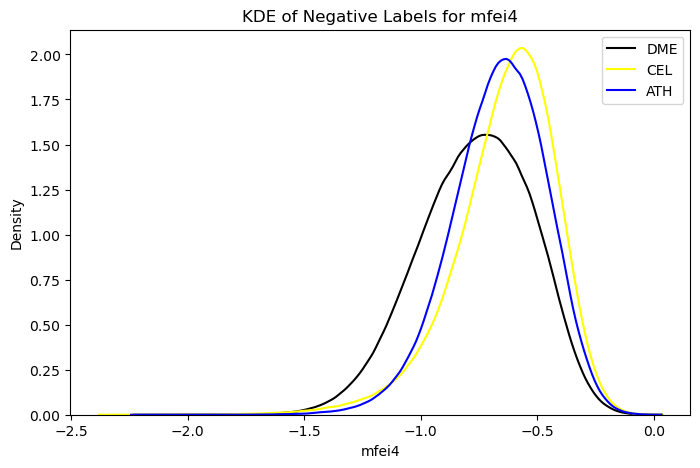

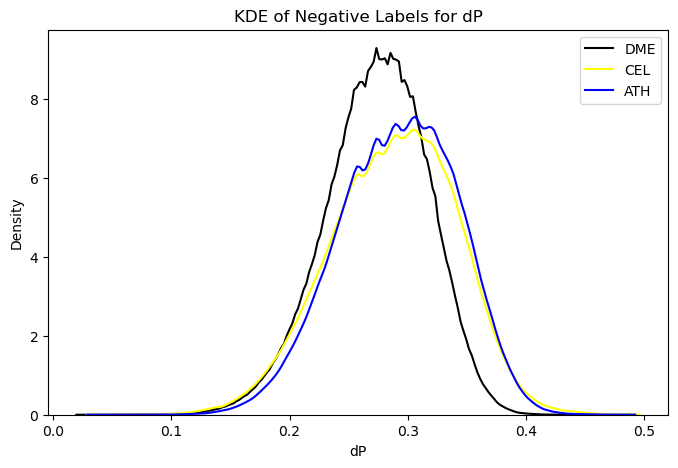

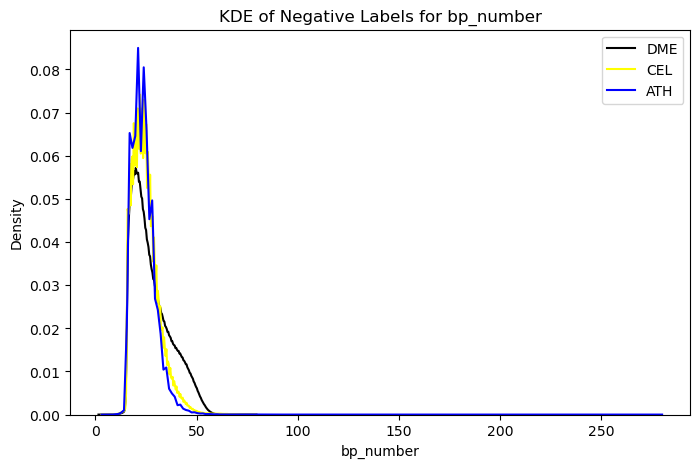

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
datasets = [
    ("DME", dme_x_positive, dme_x_negative, 'black'),
    ("CEL", cel_x_positive, cel_x_negative, 'yellow'),
    ("ATH", ath_x_positive, ath_x_negative, 'blue')
]
features = ['mfe', 'efe', 'dG', 'triplets0', 'mfei4', 'dP', 'bp_number']

# Plotting for positive labels
for feature in features:
    plt.figure(figsize=(8, 5))
    for dataset_name, positive, _, color in datasets:
        sns.kdeplot(positive[feature], label=dataset_name, fill=False, color=color)
    plt.title(f"KDE of Positive Labels for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Plotting for negative labels
for feature in features:
    plt.figure(figsize=(8, 5))
    for dataset_name, _, negative, color in datasets:
        sns.kdeplot(negative[feature], label=dataset_name, fill=False, color=color)
    plt.title(f"KDE of Negative Labels for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()




